In [2]:
import os
import shap
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

shap.initjs()

In [3]:
TRAINPATH = os.path.join('../','dataset','titanic','train.csv')
TESTPATH = os.path.join('../','dataset','titanic','test.csv')

In [4]:
train = pd.read_csv(TRAINPATH)


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
use_columns = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

In [7]:
for column in ['Pclass', 'Sex', 'Embarked']:
    train[column] = train[column].astype('category')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [13]:
X_train, X_val, y_train, y_val = train_test_split(train[use_columns], train['Survived'], test_size=0.2)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 153 to 528
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    category
 1   Sex       712 non-null    category
 2   Age       571 non-null    float64 
 3   SibSp     712 non-null    int64   
 4   Parch     712 non-null    int64   
 5   Fare      712 non-null    float64 
 6   Embarked  710 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 30.2 KB


In [14]:
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

In [15]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": {"binary_logloss",'auc'},
    "verbose": -1,
}

model = lgb.train(params, d_train, 100, valid_sets= d_val, early_stopping_rounds= 50)

[1]	valid_0's auc: 0.77677	valid_0's binary_logloss: 0.665584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.787793	valid_0's binary_logloss: 0.63627
[3]	valid_0's auc: 0.785966	valid_0's binary_logloss: 0.614331
[4]	valid_0's auc: 0.789746	valid_0's binary_logloss: 0.594355
[5]	valid_0's auc: 0.785462	valid_0's binary_logloss: 0.581122
[6]	valid_0's auc: 0.797304	valid_0's binary_logloss: 0.568664
[7]	valid_0's auc: 0.797871	valid_0's binary_logloss: 0.5574
[8]	valid_0's auc: 0.804233	valid_0's binary_logloss: 0.550304
[9]	valid_0's auc: 0.807319	valid_0's binary_logloss: 0.544211
[10]	valid_0's auc: 0.804989	valid_0's binary_logloss: 0.537087
[11]	valid_0's auc: 0.80776	valid_0's binary_logloss: 0.532048
[12]	valid_0's auc: 0.816767	valid_0's binary_logloss: 0.524882
[13]	valid_0's auc: 0.817901	valid_0's binary_logloss: 0.522552
[14]	valid_0's auc: 0.819287	valid_0's binary_logloss: 0.51942
[15]	valid_0's auc: 0.818657	valid_0's binary_logloss: 0.5

In [16]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [17]:
shap_values[0]

array([[ 2.24562773e-01,  1.16121635e+00,  1.89023350e-01, ...,
        -1.32631073e-02,  6.48928583e-01, -8.21089967e-02],
       [ 8.11872498e-01, -1.24288480e+00, -1.16743152e-01, ...,
         1.81048487e-02,  1.09689476e-02, -4.31205045e-01],
       [ 2.41254688e-01,  7.91906862e-01,  1.09932754e-01, ...,
        -2.50536191e-02,  1.96982193e-03,  5.71513479e-02],
       ...,
       [-9.73889971e-01, -2.11505929e+00, -1.16583876e-01, ...,
        -3.28993821e-02, -3.86597671e-01, -1.57602395e-01],
       [-8.01762741e-01, -1.91022127e+00, -1.97608029e-01, ...,
        -3.42280547e-02, -4.00943073e-01, -2.03482654e-01],
       [-8.59922505e-01, -2.53094545e+00, -7.98284054e-02, ...,
         2.10862602e-01,  4.59532556e-01,  8.07541969e-02]])

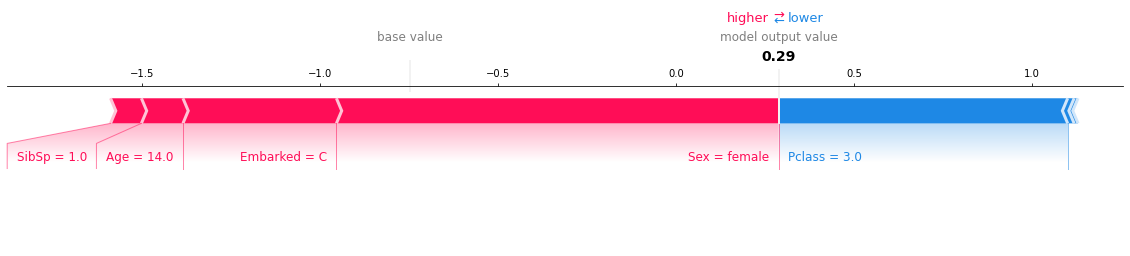

In [22]:
index = 1
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1][index,:], 
    features=X_train.iloc[index,:],
    # link='logit',
    matplotlib=True
)

In [21]:
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1], features=X_train, link='logit')

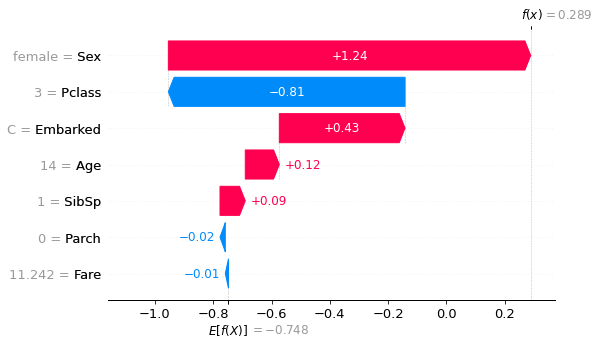

In [23]:
index = 1
shap.waterfall_plot(
    expected_value=explainer.expected_value[1], 
    shap_values=shap_values[1][index,:], 
    features=X_train.iloc[index,:],
    show=True
)

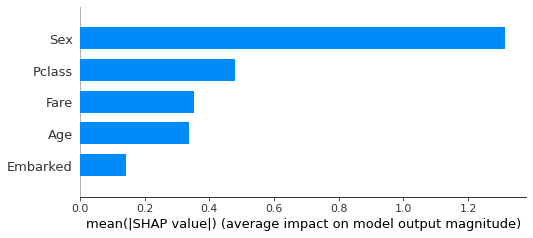

In [36]:
shap.summary_plot(
    shap_values=shap_values[1], 
    features=X_train,
    max_display=5,
    plot_type='bar'
)

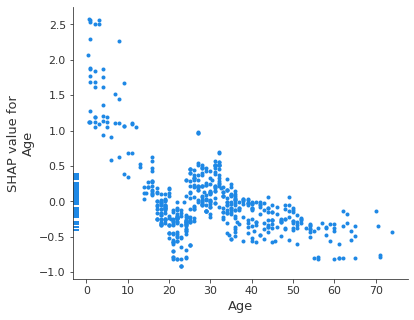

In [32]:
shap.dependence_plot(
    ind="Age",
    shap_values=shap_values[1],
    features=X_train,
    interaction_index=None
)

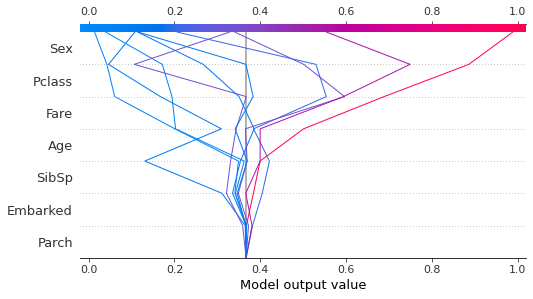

In [152]:
shap.decision_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1][:10,:], 
    features=X_train.iloc[:10,:],
    link="logit",
    show=True
)